In [9]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import os
from evaluate_model import evaluate_model, get_data, plot_accuracy, plot_loss
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
shape, classes, data = get_data()
train_data, val_data, test_data = data

Found 2392 files belonging to 2 classes.
Using 1914 files for training.
Found 2392 files belonging to 2 classes.
Using 478 files for validation.
Found 597 files belonging to 2 classes.


In [3]:
inputs = Input(shape= shape)
layer1 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(inputs)
layer2 = MaxPooling2D((2,2))(layer1)
layer3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(layer2)
layer4 = MaxPooling2D((2,2))(layer3)
layer5 = Dense(16, activation='relu')(layer4)
layer6 = Flatten()(layer5)
outputs = Dense(len(classes), activation='softmax')(layer6)
fd_model = Model(inputs=inputs, outputs=outputs)

fd_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
fd_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 dense (Dense)               (None, 43, 43, 16)        528   

In [4]:
fd_model_hist = fd_model.fit(
  train_data,
  validation_data=val_data,
  epochs=10
)

Epoch 1/10
60/60 [==============================] - 18s 293ms/step - loss: 8.2695 - accuracy: 0.5972 - val_loss: 0.6328 - val_accuracy: 0.7029
Epoch 2/10
60/60 [==============================] - 19s 316ms/step - loss: 0.3200 - accuracy: 0.8689 - val_loss: 0.2025 - val_accuracy: 0.9121
Epoch 3/10
60/60 [==============================] - 19s 312ms/step - loss: 0.2027 - accuracy: 0.9148 - val_loss: 0.1025 - val_accuracy: 0.9686
Epoch 4/10
60/60 [==============================] - 19s 312ms/step - loss: 0.0672 - accuracy: 0.9848 - val_loss: 0.0584 - val_accuracy: 0.9791
Epoch 5/10
60/60 [==============================] - 19s 311ms/step - loss: 0.0449 - accuracy: 0.9875 - val_loss: 0.0359 - val_accuracy: 0.9833
Epoch 6/10
60/60 [==============================] - 19s 314ms/step - loss: 0.0136 - accuracy: 0.9995 - val_loss: 0.0349 - val_accuracy: 0.9854
Epoch 7/10
60/60 [==============================] - 19s 313ms/step - loss: 0.0091 - accuracy: 0.9995 - val_loss: 0.0244 - val_accuracy: 0.9937

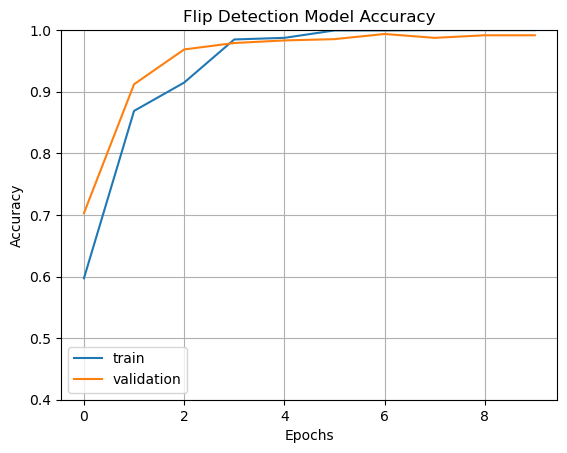

In [5]:
plot_accuracy(fd_model_hist, "Flip Detection Model")

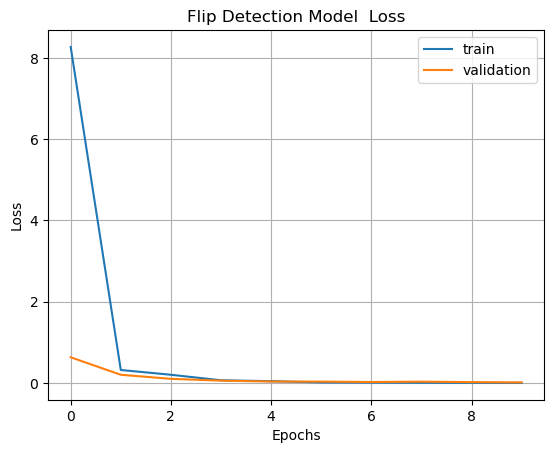

In [6]:
plot_loss(fd_model_hist, "Flip Detection Model")

1/1 [==============================] - 0s 114ms/step


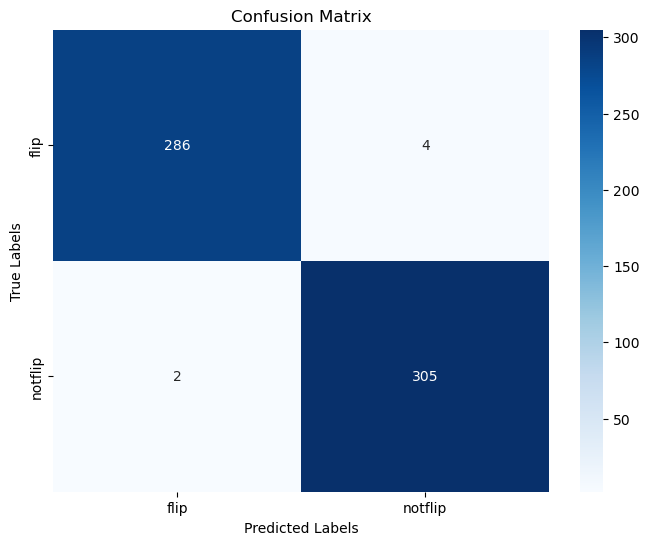

{'accuracy': 0.9899497487437185, 'f1_score': 0.9902597402597403}

In [7]:
evaluate_model(fd_model, test_data)

In [8]:
fd_model_path = '../models/fd_model.h5'
fd_model.save(fd_model_path)
fd_model_size = os.path.getsize(fd_model_path) / (1024 * 1024)
print('Model size: ', fd_model_size, 'MB')

Model size:  0.957794189453125 MB
